# TASK-1

## SUBMITTED BY: ANIRUDH GAMBHIR

# Prediction using Supervised ML

### To predict the percentage of an student based on the no. of study hours.

## 1.Importing Python  Libraries
#### These are some of the libraries we will be using in this code, we might use more as we progress forward.

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn

## 2.Dataset and its properties
Here we import our dataset which is in the form of a .csv file and we see some of the properties of the dataset. We will take help of pandas library for loading the dataset. Some visualisations will be done here with the data as well.

In [2]:
dataset=pd.read_csv("/Users/anirudhgambhir/Downloads/student_scores - student_scores.csv")

In [3]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
checksize=len(dataset)
print("Number of Entries:",checksize)

Number of Entries: 25


In [6]:
print(dataset.describe(),"\n")

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000 



In [7]:
# CORRELATION MATRIX
corrmat = dataset.corr()
corrmat

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


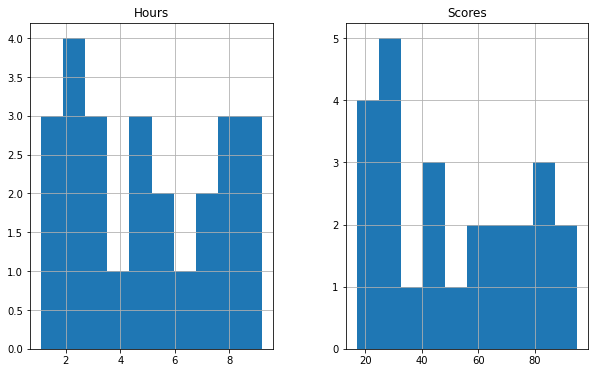

In [8]:
dataset.hist(figsize = (10, 6))
plt.show()

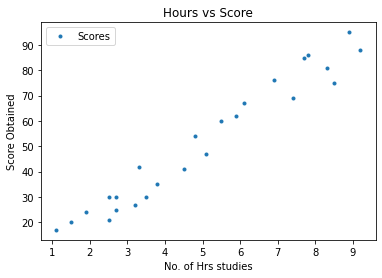

In [9]:
dataset.plot(x='Hours', y='Scores',style='.')  
plt.title('Hours vs Score')  
plt.xlabel('No. of Hrs studies')  
plt.ylabel('Score Obtained')  
plt.show()

In [10]:
print("Number of Null Value:",dataset.isnull().sum().max())

Number of Null Value: 0


## 3.Creating Training and Test dataset

We will divide our dataset into 2 parts one being the training and other test. Training data will be used to train our model meaning upon which our machine will learn how to approach towards the problem whereas on the testing data our machine will be tested for its accuracy and it will be seen how well does it perform.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=dataset.drop("Scores",axis=1)
Y=dataset["Scores"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

## 4.Model Creation and Predictions

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# FITTING THE MODEL
LR = LinearRegression()
LR.fit(X_train,Y_train)

# MAKING PREDICTIONS
predictions = LR.predict(X_test)

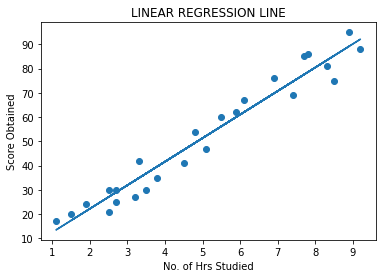

In [15]:
# LINEAR REGRESSION EQUATION
LR_eq=LR.intercept_+LR.coef_*X

# LR LINE 
plt.scatter(X, Y,label='DATASET POINTS')
plt.plot(X,LR_eq,label='LR EQUATION')
plt.title("LINEAR REGRESSION LINE")
plt.xlabel("No. of Hrs Studied")
plt.ylabel("Score Obtained")
plt.show()

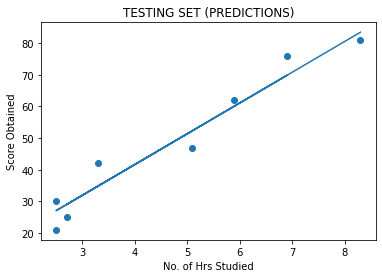

In [16]:
# PREDICTIONS GRAPH
plt.scatter(X_test, Y_test)
plt.plot(X_test,predictions)
plt.title("TESTING SET (PREDICTIONS)")
plt.xlabel("No. of Hrs Studied")
plt.ylabel("Score Obtained")
plt.show()

In [17]:
# PREDICTIONS
predictions

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [18]:
check=pd.DataFrame({"ACTUAL":Y_test,"PREDICTED":predictions})
check

,ACTUAL,PREDICTED
8,81,83.391686
16,30,27.070549
0,21,27.070549
23,76,69.796929
11,62,60.086388
9,25,29.012657
13,42,34.838982
1,47,52.317955


In [19]:
score=LR.score(X_test,Y_test)
print("Score:",LR.score(X_test,Y_test))

Score: 0.9487647340257012


In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("Mean Squared Error:",mean_squared_error(Y_test, predictions))
print('Mean Absolute Error:',mean_absolute_error(Y_test,predictions)) 

Mean Squared Error: 23.61945761415174
Mean Absolute Error: 4.499999999999998


### MAKING OUR OWN PREDICTIONS USING USER INPUTS

In [22]:
hours = [[int(input("ENTER NO. Of Hrs Studied: "))]]
score_pred = LR.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(score_pred[0]))

ENTER NO. Of Hrs Studied: 9
No of Hours = [[9]]
Predicted Score = 90.18906510429821
